In [1]:
import pandas as pd
import numpy as np
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('like or not like their friends interfered.csv', encoding='cp1252')

print(df) 

   Q2.11                                              Q2.12
0    NaN                                                NaN
1    NaN                                                NaN
2    NaN                                                NaN
3    NaN                                                NaN
4    NaN                                                NaN
..   ...                                                ...
66   NaN                                                NaN
67   Yes                                                  -
68   Yes                                     a wake up call
69   NaN                                                NaN
70   Yes  yes and no. yes because it means they care. no...

[71 rows x 2 columns]


In [8]:
df.rename(columns={'Q2.11': 'did_you_like_your_friend_interfered', 'Q2.12': 'interfered'}, inplace=True)
df.head(10)

,did_you_like_your_friend_interfered,interfered
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [13]:
df2 = df[df.did_you_like_your_friend_interfered == 'Yes']
df2.head(15)

,did_you_like_your_friend_interfered,interfered
12,Yes,.
14,Yes,-
16,Yes,they show care and concern for me
25,Yes,brother bro
31,Yes,shows they care
39,Yes,they are looking out for me
46,Yes,they are just showing that they care
50,Yes,They genuinely cared for my health
67,Yes,-
68,Yes,a wake up call


In [14]:
df2 = df2[df2.interfered != "-"]
df2

,did_you_like_your_friend_interfered,interfered
12,Yes,.
16,Yes,they show care and concern for me
25,Yes,brother bro
31,Yes,shows they care
39,Yes,they are looking out for me
46,Yes,they are just showing that they care
50,Yes,They genuinely cared for my health
68,Yes,a wake up call
70,Yes,yes and no. yes because it means they care. no...


In [15]:
df2 = df2[df2.interfered != "."]
df2

,did_you_like_your_friend_interfered,interfered
16,Yes,they show care and concern for me
25,Yes,brother bro
31,Yes,shows they care
39,Yes,they are looking out for me
46,Yes,they are just showing that they care
50,Yes,They genuinely cared for my health
68,Yes,a wake up call
70,Yes,yes and no. yes because it means they care. no...


In [16]:
interfered_longtext = " ".join(text for text in df2.interfered)
interfered_longtext 

'they show care and concern for me brother bro shows they care they are looking out for me they are just showing that they care They genuinely cared for my health a wake up call yes and no. yes because it means they care. no bcs when they mentioned i was in the midst of a relapse and did not want to stop. they had my bests interested at heart but i wasn’t ready to listen.'

In [17]:
stopwords = set(STOPWORDS)
print(stopwords)

{'during', 'doing', 'get', 'is', 'herself', 'its', "what's", 'has', "shan't", 'very', "won't", 'and', 'been', 'her', "he'll", 'it', 'myself', 'our', 'when', 'therefore', 'by', 'more', 'so', 'can', 'i', "i'll", 'which', "they'd", 'else', 'over', 'after', 'with', 'against', "isn't", "i'm", 'r', 'through', "when's", 'up', 'these', 'itself', 'cannot', 'both', "they've", 'or', 'should', "she's", 'other', "let's", 'com', 'from', "couldn't", "who's", 'then', 'would', 'hence', "don't", 'of', 'but', 'do', 'we', "there's", 'to', 'out', 'yours', 'theirs', 'like', 'hers', 'no', "why's", "doesn't", 'under', 'www', "wasn't", "aren't", 'him', 'your', 'again', 'ourselves', 'where', 'his', 'are', 'http', 'each', "that's", 'were', 'their', 'could', 'off', 'in', 'yourselves', 'those', 'ours', "i've", 'be', 'did', "haven't", 'further', "we'd", 'into', 'he', 'you', 'otherwise', 'most', 'an', 'had', 'once', 'having', 'themselves', 'how', 'on', "here's", 'some', "wouldn't", "how's", 'k', 'the', 'about', 'as'

In [21]:
interfered_longtext = interfered_longtext.lower()
stopwords.update(["wasn", "means", "bcs", "t", "show", "know", "want"])
print(stopwords)
interfered_longtext

{'during', 'doing', 'get', 'is', 'herself', 'its', "what's", 'has', "shan't", 'very', "won't", 'and', 'been', 'her', "he'll", 'it', 'myself', 'our', 'when', 'therefore', 'by', 'more', 'so', 'bcs', 'can', 'i', "i'll", 'which', "they'd", 'else', 'over', 'after', 'with', 'against', "isn't", "i'm", 'r', 'through', "when's", 'up', 'these', 'want', 'itself', 'cannot', 'both', "they've", 'or', 'should', "she's", 'other', "let's", 'com', 'from', "couldn't", "who's", 'then', 'would', 'hence', "don't", 'of', 'but', 'do', 'we', "there's", 'know', 'to', 'out', 'yours', 'theirs', 'like', 'hers', 'no', "why's", "doesn't", 'under', 'www', "wasn't", "aren't", 'him', 'your', 'again', 'ourselves', 'where', 'his', 'are', 'http', 'each', "that's", 'were', 'their', 't', 'show', 'could', 'off', 'in', 'yourselves', 'those', 'ours', "i've", 'be', 'did', "haven't", 'further', "we'd", 'into', 'he', 'you', 'otherwise', 'most', 'an', 'had', 'once', 'having', 'themselves', 'how', 'on', "here's", 'some', "wouldn't"

'they show care and concern for me brother bro shows they care they are looking out for me they are just showing that they care they genuinely cared for my health a wake up call yes and no. yes because it means they care. no bcs when they mentioned i was in the midst of a relapse and did not want to stop. they had my bests interested at heart but i wasn’t ready to listen.'

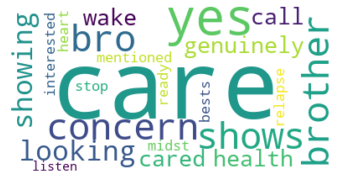

In [22]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_words=70, background_color="white").generate(interfered_longtext)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Save the image in the img folder:
wordcloud.to_file("like or not like interfered.png")